In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

from neural_verification import GeneralRNNConfig, GeneralRNN

Max test accuracy: 0.988781750202179


Text(0.5, 0.98, 'MSE loss with zero convention')

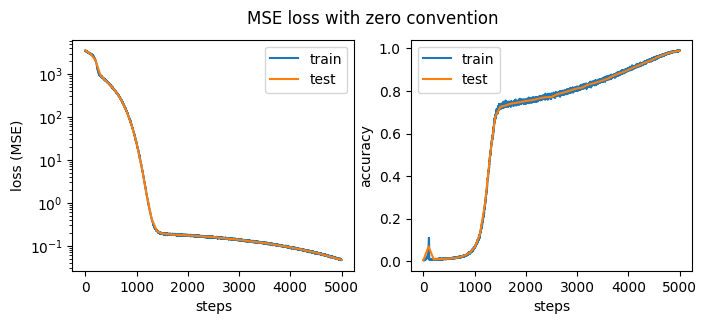

In [7]:
# 0: MSE with zero convention
args = torch.load("0/args.pt")
metrics = torch.load("0/metrics.pt")
model_config = torch.load("0/model_config.pt")

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.plot(metrics['train_steps'], metrics['train_losses'], label='train')
plt.plot(metrics['test_steps'], metrics['test_losses'], label='test')
plt.xlabel("steps")
plt.ylabel("loss (MSE)")
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(metrics['train_steps'], metrics['train_accuracies'], label='train')
plt.plot(metrics['test_steps'], metrics['test_accuracies'], label='test')
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
print("Max test accuracy:", max(metrics['test_accuracies']))

plt.suptitle("MSE loss with zero convention")

Max test accuracy: 1.0


Text(0.5, 0.98, '0.5*log(1+x^2) loss with zero convention')

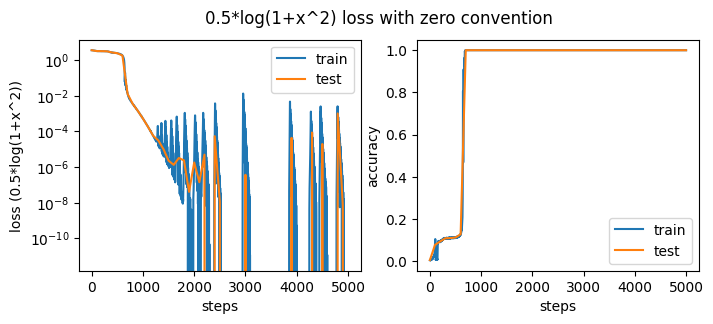

In [11]:
# 0: 0.5*log(1+x^2) loss with zero convention
args = torch.load("1/args.pt")
metrics = torch.load("1/metrics.pt")
model_config = torch.load("1/model_config.pt")

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.plot(metrics['train_steps'], metrics['train_losses'], label='train')
plt.plot(metrics['test_steps'], metrics['test_losses'], label='test')
plt.xlabel("steps")
plt.ylabel("loss (0.5*log(1+x^2))")
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(metrics['train_steps'], metrics['train_accuracies'], label='train')
plt.plot(metrics['test_steps'], metrics['test_accuracies'], label='test')
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
print("Max test accuracy:", max(metrics['test_accuracies']))

plt.suptitle("0.5*log(1+x^2) loss with zero convention")

Max test accuracy: 0.04534912109375


Text(0.5, 0.98, 'MSE loss with identity convention')

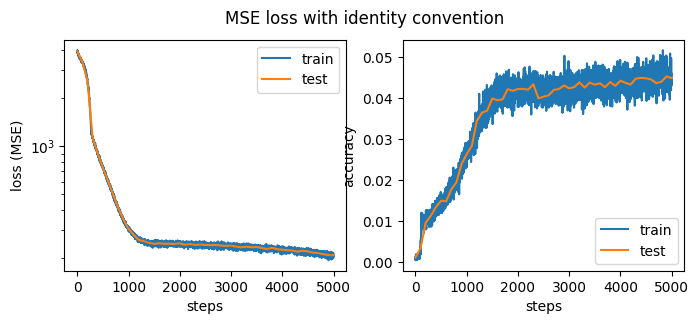

In [13]:
# 0: MSE loss with identity convention
args = torch.load("2/args.pt")
metrics = torch.load("2/metrics.pt")
model_config = torch.load("2/model_config.pt")

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.plot(metrics['train_steps'], metrics['train_losses'], label='train')
plt.plot(metrics['test_steps'], metrics['test_losses'], label='test')
plt.xlabel("steps")
plt.ylabel("loss (MSE)")
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(metrics['train_steps'], metrics['train_accuracies'], label='train')
plt.plot(metrics['test_steps'], metrics['test_accuracies'], label='test')
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
print("Max test accuracy:", max(metrics['test_accuracies']))

plt.suptitle("MSE loss with identity convention")

Max test accuracy: 0.9012972116470337


Text(0.5, 0.98, '0.5*log(1+x^2) loss with identity convention')

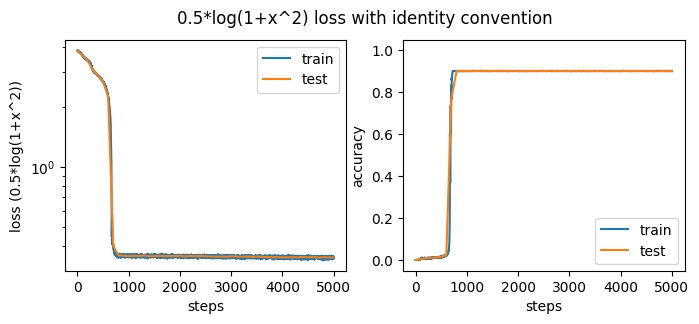

In [16]:
# 0: 0.5*log(1+x^2) loss with identity convention
args = torch.load("3/args.pt")
metrics = torch.load("3/metrics.pt")
model_config = torch.load("3/model_config.pt")

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.plot(metrics['train_steps'], metrics['train_losses'], label='train')
plt.plot(metrics['test_steps'], metrics['test_losses'], label='test')
plt.xlabel("steps")
plt.ylabel("loss (0.5*log(1+x^2))")
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(metrics['train_steps'], metrics['train_accuracies'], label='train')
plt.plot(metrics['test_steps'], metrics['test_accuracies'], label='test')
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.ylim(-0.05, 1.05)
plt.legend()
print("Max test accuracy:", max(metrics['test_accuracies']))

plt.suptitle("0.5*log(1+x^2) loss with identity convention")

In [ ]:
# Okay! We get 90% accuracy when the convention is for the first answer
# to be the first input. But we get 100% accuracy when the convention is
# for the first answer to be zero. Very useful to know!

In [6]:
from eval import configs

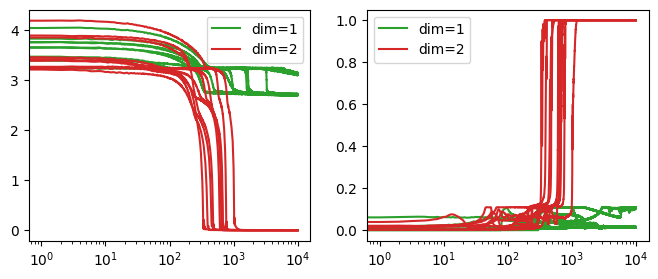

In [18]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
for i, (dim, seed) in enumerate(configs):
    color = "C2" if dim == 1 else "C3"
    # load up data from dedicated folder
    metrics = torch.load(f"results/{i}/metrics.pt")
    plt.plot(metrics['train_steps'], metrics['train_losses'], label=f"dim={dim}" if (i == 0 or i == 10) else None, color=color)

plt.xscale('log')
# plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
for i, (dim, seed) in enumerate(configs):
    color = "C2" if dim == 1 else "C3"
    # load up data from dedicated folder
    metrics = torch.load(f"results/{i}/metrics.pt")
    plt.plot(metrics['train_steps'], metrics['train_accuracies'], label=f"dim={dim}" if (i == 0 or i == 10) else None, color=color)

plt.xscale('log')
plt.legend()

In [24]:
# let's load up the weights of a perfect model
model_config = torch.load("results/10/model_config.pt")
perfect_state_dict = torch.load("results/10/model_perfect.pt")
model = GeneralRNN(model_config)
model.load_state_dict(perfect_state_dict)

<All keys matched successfully>

In [29]:
model.hmlp.mlp[0].weight

Parameter containing:
tensor([[ 0.1561,  0.0230, -1.0999],
        [-1.0599, -0.1561, -0.3163]], requires_grad=True)

In [30]:
model.ymlp.mlp[0].weight

Parameter containing:
tensor([[-0.2271,  0.7895]], requires_grad=True)